In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('pandaCSV/iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(columns=['Species'],inplace=True)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

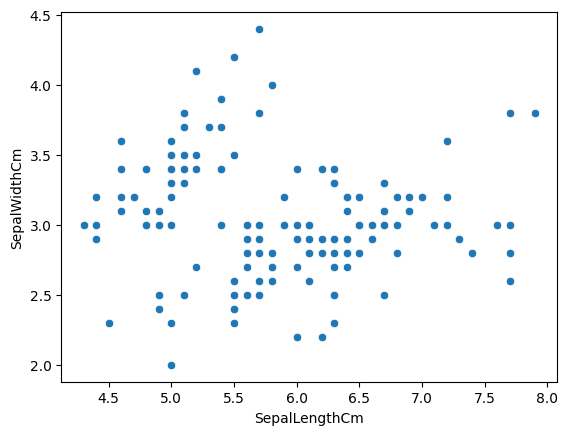

In [5]:
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

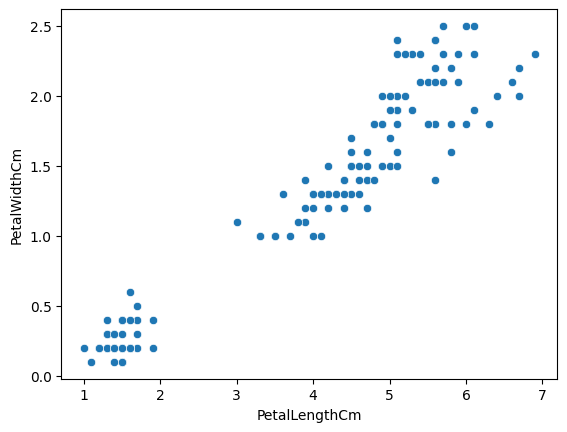

In [6]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm")

In [7]:
x=df.iloc[:,3:]
print(x)

     PetalLengthCm  PetalWidthCm
0              1.4           0.2
1              1.4           0.2
2              1.3           0.2
3              1.5           0.2
4              1.4           0.2
..             ...           ...
145            5.2           2.3
146            5.0           1.9
147            5.2           2.0
148            5.4           2.3
149            5.1           1.8

[150 rows x 2 columns]


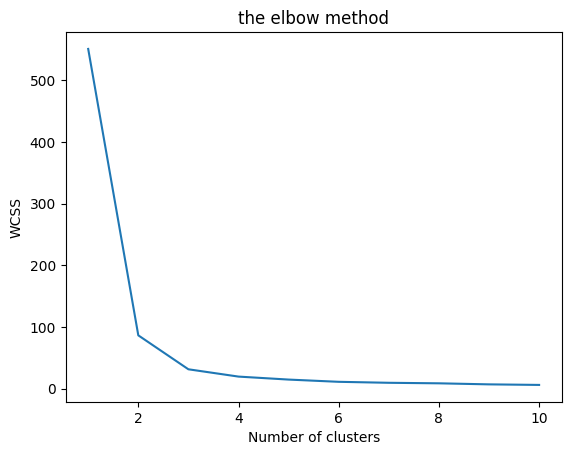

In [8]:
# finding the required number of clusters

wcss=[] #within-clusters sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=6)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=6)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


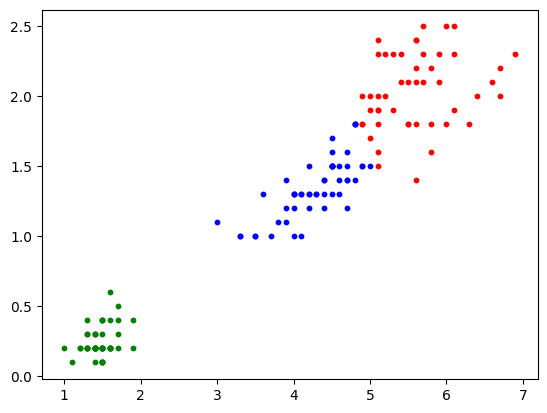

In [10]:
plt.scatter(x[y_kmeans==0]['PetalLengthCm'],x[y_kmeans==0]['PetalWidthCm'],s=10,c='red',label='Iris Santosa')
plt.scatter(x[y_kmeans==1]['PetalLengthCm'],x[y_kmeans==1]['PetalWidthCm'],s=10,c='green',label='Iris Versicolor')
plt.scatter(x[y_kmeans==2]['PetalLengthCm'],x[y_kmeans==2]['PetalWidthCm'],s=10,c='blue',label='Iris Verginica')
